In [1]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm


In [40]:
resultPath = 'C:/Users/HP/Downloads/Results/CNN'
train_folder = os.listdir(DATA_PATH).remove("New_Spam")

In [96]:
DATA_PATH = "C:/Users/HP/Downloads/derdze_image_spam_dataset/"
spamData=[]
label=[]
hashList=[]
count=-1
for folder in os.listdir(DATA_PATH):
    print(">>>Reading ",folder)
    count+=1
    
    for file in os.listdir(DATA_PATH+folder):
        if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')or str(file).endswith('.PNG')or str(file).endswith('.png') or str(file).endswith('.bmp')or str(file).endswith('.BMP')):
            img = image.imread(DATA_PATH+folder+'/'+file)
            hsh = hash(tuple(np.array(img).flatten()))
            if(hsh not in hashList):
                spamData.append(resize(img, (156, 156, 3)))
                hashList.append(hsh)
                label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  personal_image_ham
>>>Reading  personal_image_spam


In [97]:
print("Number of HAM",len(label[label==0]))
print("Number of SPAM",len(label[label==1]))

Number of HAM 1519
Number of SPAM 1266


In [98]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (2785, 156, 156, 3)  Label shape :  (2785,)


In [99]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [100]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (1949, 156, 156, 3)  y_train shape :  (1949,)
x_test shape :  (836, 156, 156, 3)  y_test shape :  (836,)


In [101]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 1063
Number of train HAM 886
Number of test SPAM 456
Number of test HAM 380


In [102]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (1949, 2)  y_test_oh shape :  (836, 2)


In [103]:
NO_OF_EPOCHS=20
BATCH_SIZE=32

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 156, 156, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 128)       73856     
                                                                 
 dropout_4 (Dropout)         (None, 39, 39, 128)      

In [104]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.2,callbacks=[checkpointer,csv_logger,reduce_lr])

Epoch 1/20
61/61 [==============================] - 59s 905ms/step - loss: 0.6243 - accuracy: 0.7953 - val_loss: 0.4180 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/20
61/61 [==============================] - 57s 938ms/step - loss: 0.3293 - accuracy: 0.8630 - val_loss: 0.3417 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 3/20
61/61 [==============================] - 55s 902ms/step - loss: 0.2541 - accuracy: 0.9102 - val_loss: 0.2643 - val_accuracy: 0.9175 - lr: 0.0010
Epoch 4/20
61/61 [==============================] - 56s 924ms/step - loss: 0.2201 - accuracy: 0.9251 - val_loss: 0.2913 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 5/20
61/61 [==============================] - 56s 920ms/step - loss: 0.2265 - accuracy: 0.9220 - val_loss: 0.2973 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 6/20
61/61 [==============================] - 55s 910ms/step - loss: 0.1797 - accuracy: 0.9292 - val_loss: 0.2838 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 7/20
61/61 [==============================] - 55s 910ms/st

In [105]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

27/27 [==============================] - 4s 160ms/step


In [106]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.965311004784689
0.9808219178082191
0.9421052631578948
0.9610738255033557
[[449   7]
 [ 22 358]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       456
           1       0.98      0.94      0.96       380

    accuracy                           0.97       836
   macro avg       0.97      0.96      0.96       836
weighted avg       0.97      0.97      0.97       836



In [107]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.91674506 1.09988713]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[1 0 0 ... 1 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [108]:
model1=Sequential()
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model1.add(MaxPool2D(pool_size=(4, 4)))
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(3, 3)))
model1.add(Conv2D(256,kernel_size=3, padding='same',activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(2,activation='softmax'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 156, 156, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 39, 39, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 39, 39, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 256)      

In [109]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model1.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,class_weight=class_weights,validation_split = 0.2,callbacks=[checkpointer,csv_logger,reduce_lr])

Epoch 1/20
61/61 [==============================] - 58s 936ms/step - loss: 1.0070 - accuracy: 0.7665 - val_loss: 0.3759 - val_accuracy: 0.8469 - lr: 0.0010
Epoch 2/20
61/61 [==============================] - 54s 883ms/step - loss: 0.3179 - accuracy: 0.8820 - val_loss: 0.2993 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 3/20
61/61 [==============================] - 55s 904ms/step - loss: 0.2568 - accuracy: 0.9061 - val_loss: 0.2860 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 4/20
61/61 [==============================] - 59s 963ms/step - loss: 0.2176 - accuracy: 0.9128 - val_loss: 0.2477 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 5/20
61/61 [==============================] - 58s 953ms/step - loss: 0.1836 - accuracy: 0.9287 - val_loss: 0.2002 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 6/20
61/61 [==============================] - 58s 946ms/step - loss: 0.1342 - accuracy: 0.9430 - val_loss: 0.2839 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 7/20
61/61 [==============================] - 56s 926ms/st

In [110]:
prediction_prob = model1.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob)

27/27 [==============================] - 5s 170ms/step


In [111]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9641148325358851
0.9605263157894737
0.9605263157894737
0.9605263157894737
[[441  15]
 [ 15 365]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       456
           1       0.96      0.96      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836



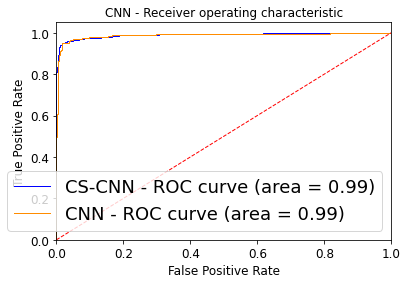

In [112]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])


pyplot.figure()
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CS-CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob1)
    roc_auc[i] = auc(fpr[i], tpr[i])
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])
pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

In [114]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense_4').output)
m2model = Model(inputs=model1.input,outputs=model1.get_layer('dense_6').output)

In [115]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)

m2_x_train = m2model.predict(x_train,verbose=1)
m2_x_test = m2model.predict(x_test,verbose=1)

27/27 [==============================] - 5s 180ms/step


In [116]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)
print("Shape of model2 Train and Test DF : ",m2_x_train.shape," : ",m2_x_test.shape)

Shape of model1 Train and Test DF :  (1949, 128)  :  (836, 128)
Shape of model2 Train and Test DF :  (1949, 128)  :  (836, 128)


In [117]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [118]:
LR = LogisticRegression()
LR.fit(m1_x_train, y_train)
LRprob = LR.predict_proba(m1_x_test)
y_pred = LR.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LR = LogisticRegression()
LR.fit(m2_x_train, y_train)
CS_LRprob = LR.predict_proba(m2_x_test)
y_pred = LR.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9521531100478469
Precision 0.9523096247448578
Recall :  0.9521531100478469
F1-score :  0.9521820665458381
Confusion Matrix : 
[[433  23]
 [ 17 363]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       456
           1       0.94      0.96      0.95       380

    accuracy                           0.95       836
   macro avg       0.95      0.95      0.95       836
weighted avg       0.95      0.95      0.95       836

cost-sensitive
Accuracy :  0.9593301435406698
Precision 0.9593721786235155
Recall :  0.9593301435406698
F1-score :  0.9593012351633042
Confusion Matrix : 
[[442  14]
 [ 20 360]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       456
           1       0.96      0.95      0.95       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96

In [119]:
RF = RandomForestClassifier()
RF.fit(m1_x_train, y_train)
RFprob = RF.predict_proba(m1_x_test)
y_pred = RF.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RF = RandomForestClassifier()
RF.fit(m2_x_train, y_train)
CS_RFprob = RF.predict_proba(m2_x_test)
y_pred = RF.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9605263157894737
Precision 0.9605242627555001
Recall :  0.9605263157894737
F1-score :  0.9605128094072808
Confusion Matrix : 
[[441  15]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       456
           1       0.96      0.95      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836

cost-sensitive
Accuracy :  0.9581339712918661
Precision 0.9581274311330951
Recall :  0.9581339712918661
F1-score :  0.9581293192893746
Confusion Matrix : 
[[439  17]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       456
           1       0.96      0.95      0.95       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96

In [120]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

DT = DecisionTreeClassifier()
DT.fit(m2_x_train, y_train)
CS_DTprob = DT.predict_proba(m2_x_test)
y_pred = DT.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9485645933014354
Precision 0.9490001018838056
Recall :  0.9485645933014354
F1-score :  0.9486175339248233
Confusion Matrix : 
[[429  27]
 [ 16 364]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       456
           1       0.93      0.96      0.94       380

    accuracy                           0.95       836
   macro avg       0.95      0.95      0.95       836
weighted avg       0.95      0.95      0.95       836

cost-sensitive
Accuracy :  0.9629186602870813
Precision 0.9629448497995137
Recall :  0.9629186602870813
F1-score :  0.9628969685589676
Confusion Matrix : 
[[443  13]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       456
           1       0.97      0.95      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96

In [121]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

KNN = KNeighborsClassifier()
KNN.fit(m2_x_train, y_train)
CS_KNNprob = KNN.predict_proba(m2_x_test)
y_pred = KNN.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9641148325358851
Precision 0.9641098025377501
Recall :  0.9641148325358851
F1-score :  0.9641067522974879
Confusion Matrix : 
[[442  14]
 [ 16 364]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       456
           1       0.96      0.96      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836

cost-sensitive
Accuracy :  0.9641148325358851
Precision 0.9641412627089679
Recall :  0.9641148325358851
F1-score :  0.9641224916815468
Confusion Matrix : 
[[440  16]
 [ 14 366]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       456
           1       0.96      0.96      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96

In [122]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

GNB = GaussianNB()
GNB.fit(m2_x_train, y_train)
CS_GNBprob = GNB.predict_proba(m2_x_test)
y_pred = GNB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.937799043062201
Precision 0.9407983480157871
Recall :  0.937799043062201
F1-score :  0.9379247015610652
Confusion Matrix : 
[[414  42]
 [ 10 370]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       456
           1       0.90      0.97      0.93       380

    accuracy                           0.94       836
   macro avg       0.94      0.94      0.94       836
weighted avg       0.94      0.94      0.94       836

cost-sensitive
Accuracy :  0.9533492822966507
Precision 0.953921723742343
Recall :  0.9533492822966507
F1-score :  0.9534042620827274
Confusion Matrix : 
[[430  26]
 [ 13 367]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       456
           1       0.93      0.97      0.95       380

    accuracy                           0.95       836
   macro avg       0.95      0.95      0.95       836
weighted avg       0.95      0.95      0.95   

In [123]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

AB = AdaBoostClassifier()
AB.fit(m2_x_train, y_train)
CS_ABprob = AB.predict_proba(m2_x_test)
y_pred = AB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9557416267942583
Precision 0.9557943483038152
Recall :  0.9557416267942583
F1-score :  0.9557556017724971
Confusion Matrix : 
[[436  20]
 [ 17 363]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       456
           1       0.95      0.96      0.95       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836

cost-sensitive
Accuracy :  0.9545454545454546
Precision 0.9545758575211719
Recall :  0.9545454545454546
F1-score :  0.9545551561299592
Confusion Matrix : 
[[436  20]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       456
           1       0.95      0.95      0.95       380

    accuracy                           0.95       836
   macro avg       0.95      0.95      0.95       836
weighted avg       0.95      0.95      0.95

In [124]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m2_x_train, y_train)
CS_LSVMprob = LSVM.predict_proba(m2_x_test)
y_pred = LSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9581339712918661
Precision 0.9581457912166574
Recall :  0.9581339712918661
F1-score :  0.958138500476201
Confusion Matrix : 
[[438  18]
 [ 17 363]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       456
           1       0.95      0.96      0.95       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836

cost-sensitive
Accuracy :  0.9617224880382775
Precision 0.9619059168415393
Recall :  0.9617224880382775
F1-score :  0.9616748833234734
Confusion Matrix : 
[[445  11]
 [ 21 359]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       456
           1       0.97      0.94      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96 

In [125]:
RSVM = svm.SVC(kernel='rbf',probability=True)
RSVM.fit(m1_x_train, y_train)
RSVMprob = RSVM.predict_proba(m1_x_test)
y_pred = RSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RSVM = svm.SVC(kernel='linear',probability=True)
RSVM.fit(m2_x_train, y_train)
CS_RSVMprob = RSVM.predict_proba(m2_x_test)
y_pred = RSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9593301435406698
Precision 0.9593301435406698
Recall :  0.9593301435406698
F1-score :  0.9593301435406698
Confusion Matrix : 
[[439  17]
 [ 17 363]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       456
           1       0.96      0.96      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96       836

cost-sensitive
Accuracy :  0.9617224880382775
Precision 0.9619059168415393
Recall :  0.9617224880382775
F1-score :  0.9616748833234734
Confusion Matrix : 
[[445  11]
 [ 21 359]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       456
           1       0.97      0.94      0.96       380

    accuracy                           0.96       836
   macro avg       0.96      0.96      0.96       836
weighted avg       0.96      0.96      0.96

In [126]:
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

pyplot.rc('font', size=SMALL_SIZE)          # controls default text sizes
pyplot.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pyplot.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pyplot.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

def rocinfo(pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr,tpr,roc_auc

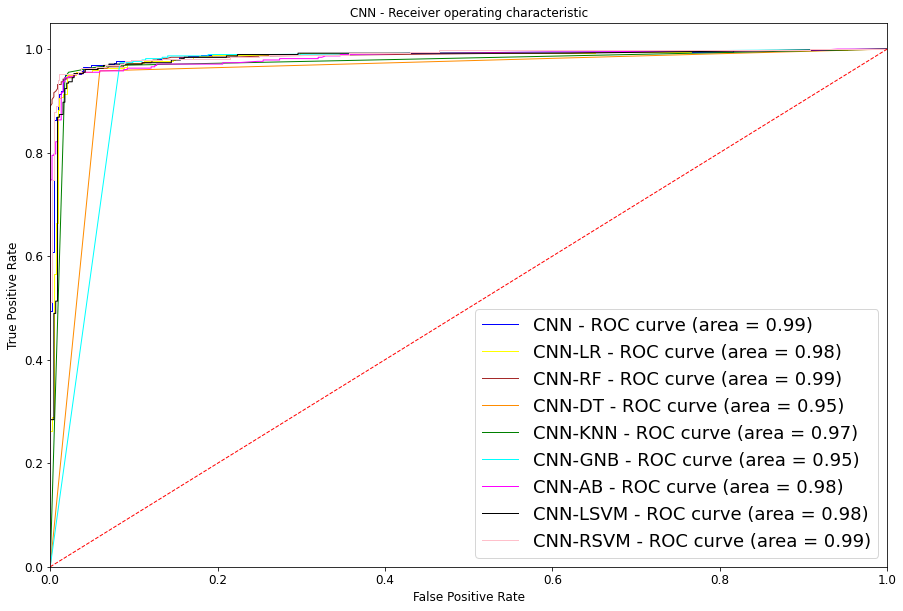

In [127]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob1) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

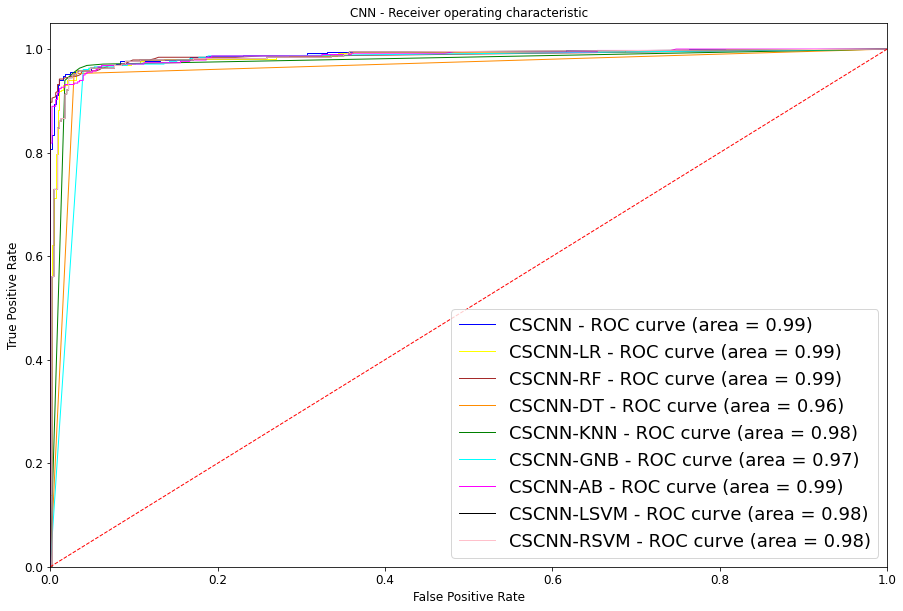

In [128]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CSCNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CSCNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CSCNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CSCNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CSCNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CSCNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CSCNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CSCNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CSCNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()